### Load the required packages and libraries.

In [2]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from loader_util.nn.conv import MinVGGNet
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes._axes as axes
sns.set()

### Load Cifar10 dataset, split into testing and training sets and normalise

In [3]:
# load the trainign and testing datasets
print('[INFO] loading Cifar10 data')
(trainx, trainy), (testx, testy) = cifar10.load_data()

# normalise the inputs
trainx = trainx.astype('float') / 255.0
testx = testx.astype('float') /255.0

# convert the labels from integers to vectors
lb = LabelBinarizer()
trainy = lb.fit_transform(trainy)
testy = lb.transform(testy)

labelNames = ['airplanes', 'automobile', 'bird', 'cat', 'deer', 'dog', 
              'frog', 'horse', 'ship', 'truck']

[INFO] loading Cifar10 data
170500096/170498071 [==============================] - 5s 0us/step


### Compile MinVGGNet model and fit Cifar10 data to the model and train

In [5]:
# compile the model and train it
print('[INFO] compiling model......')
opt = SGD(lr=0.01, momentum=0.9, nesterov=True, decay=0.01/40)
model = MinVGGNet.build(width=32, height=32, depth=3, classes=10)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# train the network
H = model.fit(trainx, trainy, validation_data=(testx, testy),
              batch_size=64, epochs=40, verbose=1)

[INFO] compiling model......
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 50000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
50000/50000 [==============================] - 19s 383us/sample - loss: 1.6347 - acc: 0.4544 - val_loss: 1.3271 - val_acc: 0.5359
Epoch 2/40
50000/50000 [==============================] - 17s 335us/sample - loss: 1.1459 - acc: 0.6023 - val_loss: 1.1154 - val_acc: 0.6068
Epoch 3/40
50000/50000 [==============================] - 17s 341us/sample - loss: 0.9646 - acc: 0.6630 - val_loss: 0.7873 - val_acc: 0.7228
Epoch 4/40
50000/50000 [==============================] - 17s 340us/sample - loss: 0.8529 - acc: 0.7023 - val_loss: 0.8023 - val_acc: 0.7182
Epoch 5/40
50000/50000 [==============================] - 17s 335us/sample - loss: 0.7859 - acc: 0.7232 - val_loss: 0.7539

### Evaluate network performance 

In [12]:
# evaluate the netork
print("[INFO] evaluating network")
preds = model.predict(testx, batch_size=64)
print(classification_report(testy.argmax(axis=1), preds.argmax(axis=1), target_names=labelNames))

epochs = range(1,41)
loss = H.history['loss']
accuracy = H.history['acc']
val_loss = H.history['val_loss']
val_accuracy = H.history['val_acc']
plot_df = pd.DataFrame(data=np.c_[epochs,loss,accuracy,val_loss,val_accuracy], 
                       columns=['epochs','loss', 'accuracy', 'val_loss', 'val_accuracy'])

[INFO] evaluating network
              precision    recall  f1-score   support

   airplanes       0.87      0.81      0.84      1000
  automobile       0.92      0.91      0.91      1000
        bird       0.80      0.71      0.76      1000
         cat       0.70      0.65      0.67      1000
        deer       0.77      0.81      0.79      1000
         dog       0.72      0.76      0.74      1000
        frog       0.84      0.90      0.87      1000
       horse       0.86      0.87      0.86      1000
        ship       0.91      0.90      0.91      1000
       truck       0.86      0.91      0.88      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



### Plot training and validation loss and accuracy curves

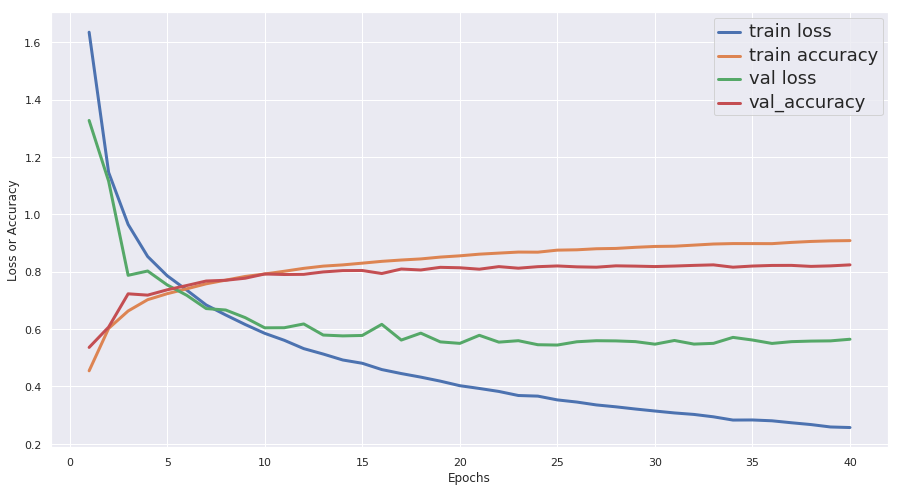

In [13]:
sns.set(font_scale=1)
f, ax = plt.subplots(1, 1, figsize=(15,8))
sns.lineplot(data=plot_df, x='epochs', y='loss', ax=ax, label='train loss', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='accuracy', ax=ax, label='train accuracy', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='val_loss', ax=ax, label='val loss', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='val_accuracy', ax=ax, label='val_accuracy', linewidth=3)
ax.set_ylabel('Loss or Accuracy')
ax.set_xlabel('Epochs')
plt.setp(ax.get_legend().get_texts(), fontsize='18'); # for legend text